In [53]:
import pandas as pd
file_path = '/Users/abhijaysingh/Documents/College/Semester 5/ML/Assignment 2/Section B/processed.cleveland.data'

column_names = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
    "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"
]

try:
    data = pd.read_csv(file_path, names=column_names, na_values='?')
    
    data_head = data.head()
    data_info = data.info()
except Exception as e:
    load_error = e


if 'load_error' in locals():
    load_error
else:
    (data_head, data_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


Checking for Missing Values

In [54]:
missing_values = data.isnull().sum()
print(missing_values)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64


Proceeding with the imputation for the ca and thal columns. For ca, which is numerical, using the median value, and for thal, which is categorical, using the mode. 

In [55]:
ca_median = data['ca'].median()
data['ca'].fillna(ca_median, inplace=True)

thal_mode = data['thal'].mode()[0]
data['thal'].fillna(thal_mode, inplace=True)

missing_values_after_imputation = data.isnull().sum()
missing_values_after_imputation

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

Convert categorical variables to 'category' datatype

In [56]:
categorical_variables = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'num']

for col in categorical_variables:
    data[col] = data[col].astype('category')

Adjusting the target variable 'num' to reflect the positive class as classes 1 to 4 and the negative class as 0
Converting 'num' > 0 to 1 for positive class and 'num' = 0 to 0 for negative class

In [57]:
data['num'] = data['num'].apply(lambda x: 1 if x > 0 else 0)

Getting a summary description of the dataset to understand the distributions

In [58]:
data_description = data.describe(include='all')
data_description, data.dtypes

(               age    sex     cp    trestbps        chol    fbs  restecg  \
 count   303.000000  303.0  303.0  303.000000  303.000000  303.0    303.0   
 unique         NaN    2.0    4.0         NaN         NaN    2.0      3.0   
 top            NaN    1.0    4.0         NaN         NaN    0.0      0.0   
 freq           NaN  206.0  144.0         NaN         NaN  258.0    151.0   
 mean     54.438944    NaN    NaN  131.689769  246.693069    NaN      NaN   
 std       9.038662    NaN    NaN   17.599748   51.776918    NaN      NaN   
 min      29.000000    NaN    NaN   94.000000  126.000000    NaN      NaN   
 25%      48.000000    NaN    NaN  120.000000  211.000000    NaN      NaN   
 50%      56.000000    NaN    NaN  130.000000  241.000000    NaN      NaN   
 75%      61.000000    NaN    NaN  140.000000  275.000000    NaN      NaN   
 max      77.000000    NaN    NaN  200.000000  564.000000    NaN      NaN   
 
            thalach  exang     oldpeak  slope          ca   thal         n

Visualizing the data

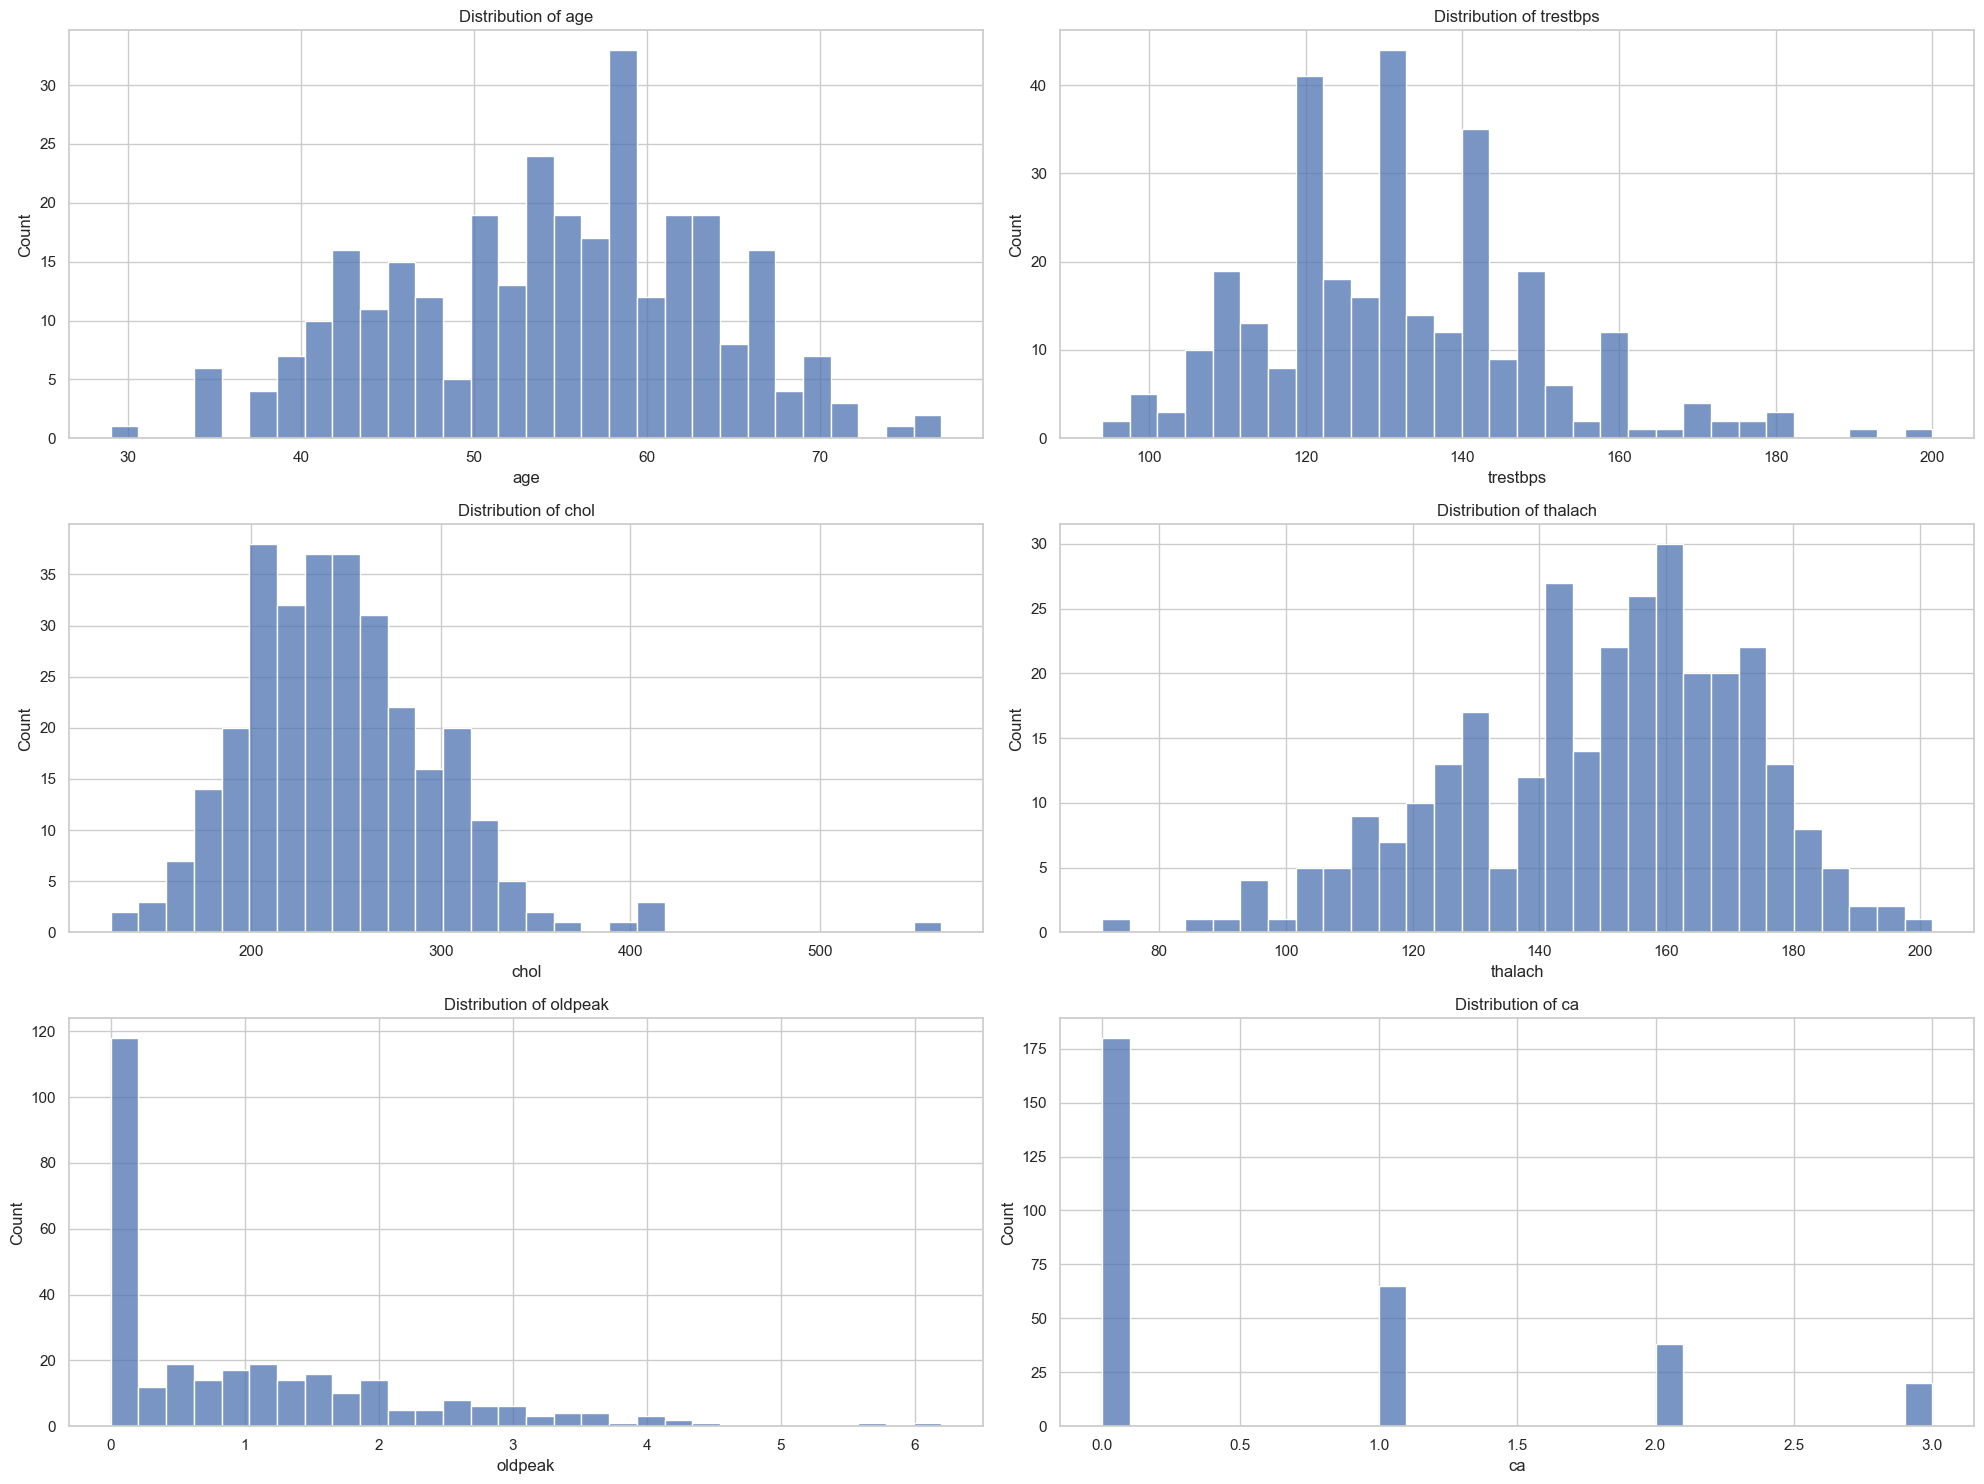

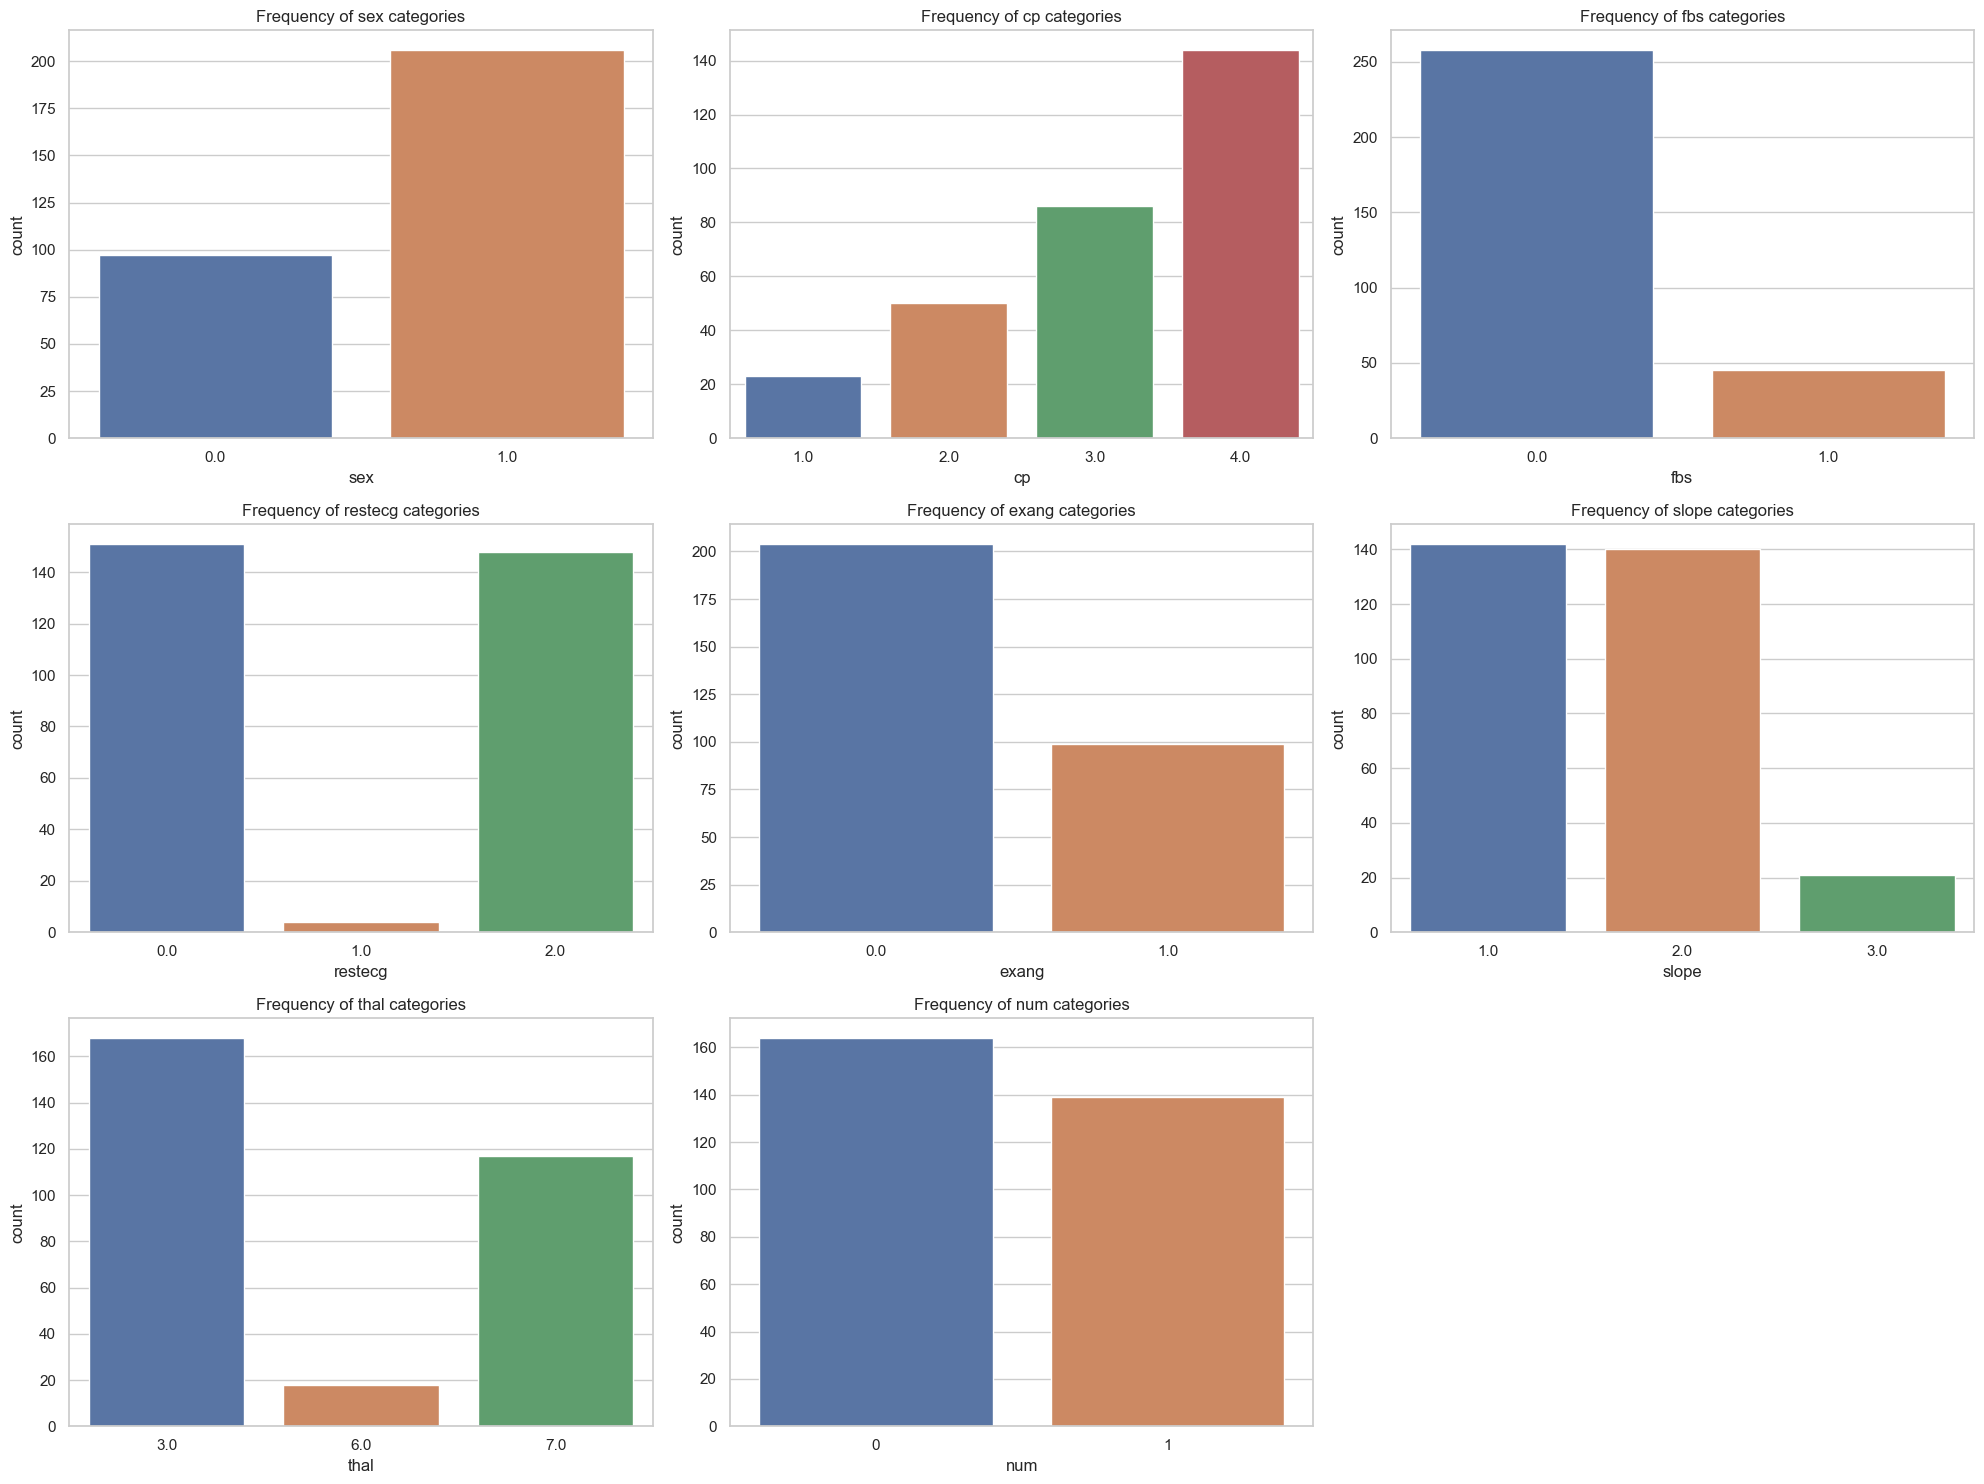

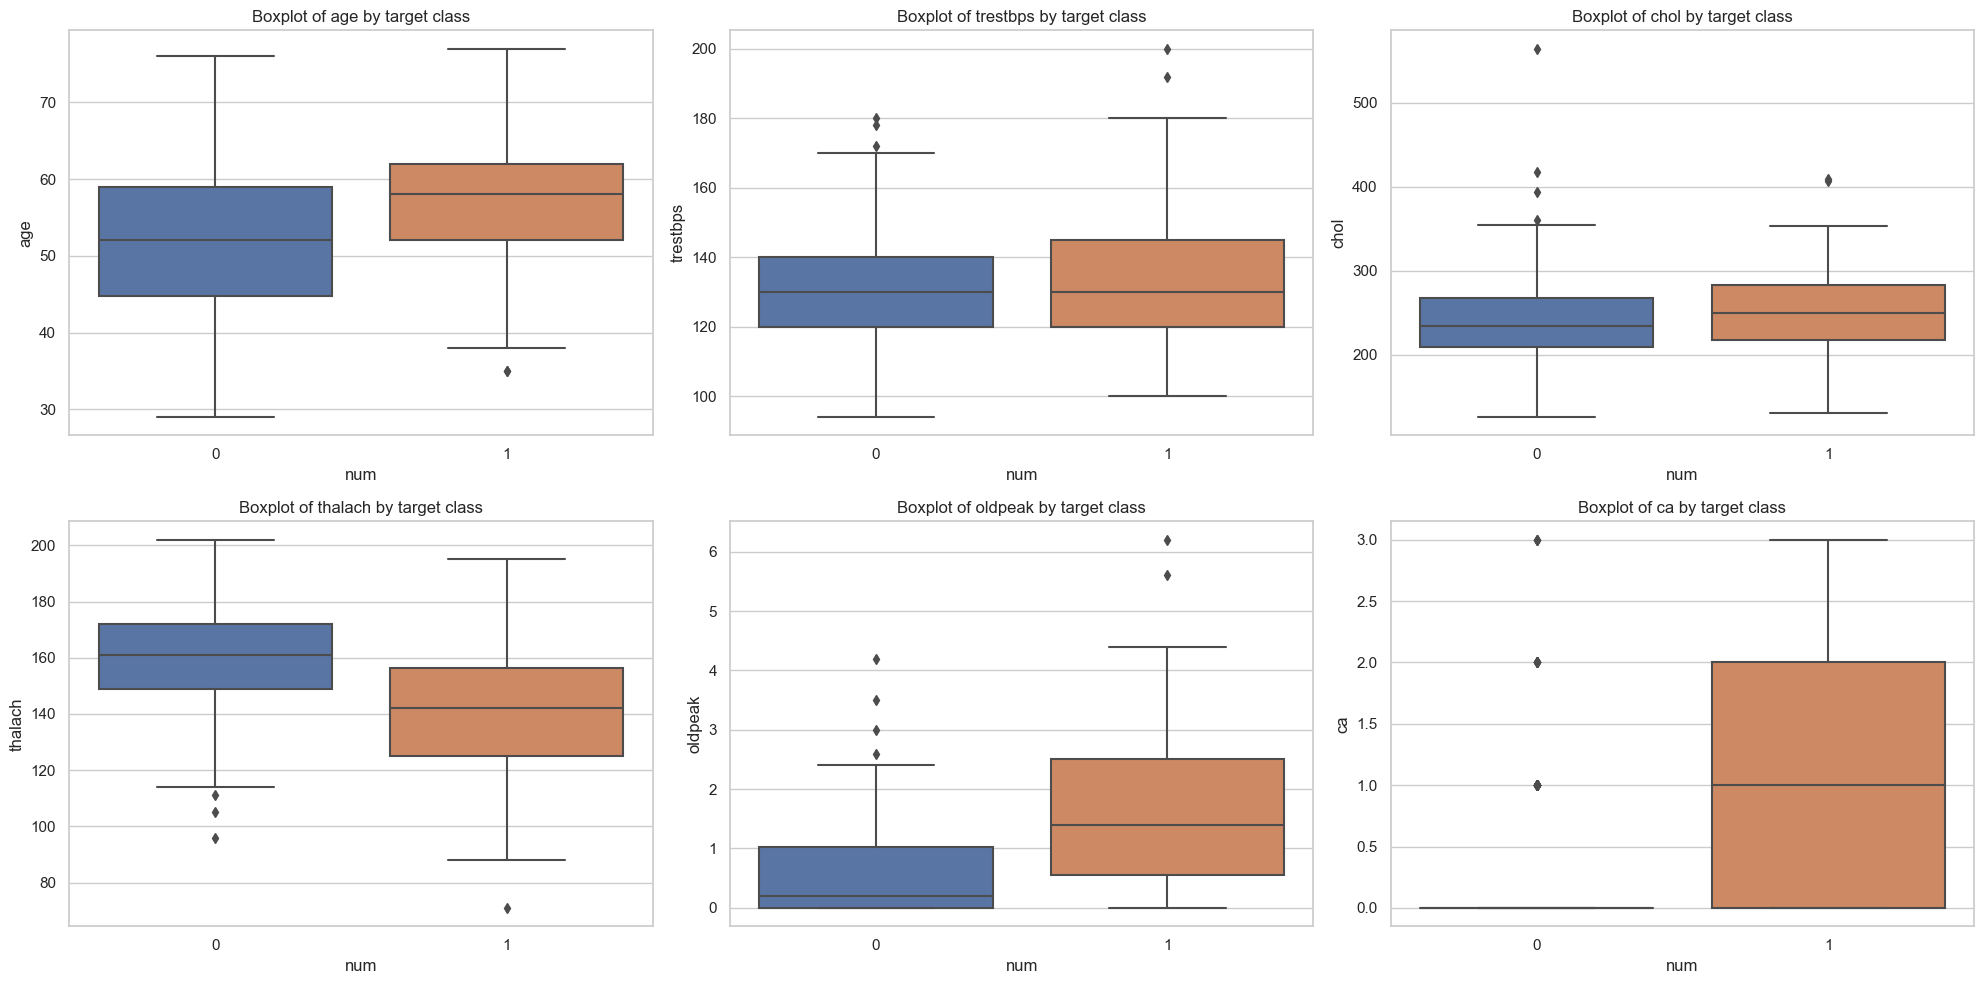

/var/folders/lt/zm3cllm92jlctchm20gs809r0000gn/T/ipykernel_6545/4056812216.py:46: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='viridis', fmt=".2f", linewidths=.5, linecolor='black')


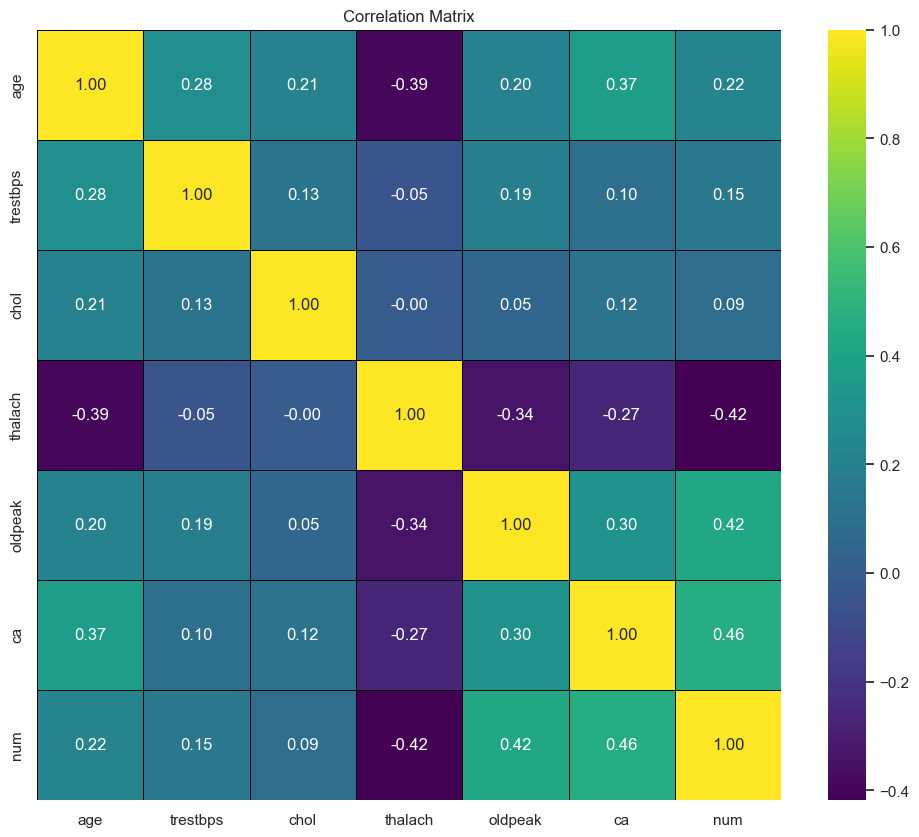

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")
plt.figure(figsize=(20, 15))


numerical_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
categorical_variables = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'num']

# Generating histograms for numerical columns
for index, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 2, index)
    sns.histplot(data[column], kde=False, bins=30)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 15))

# Generate bar plots for categorical columns
for index, column in enumerate(categorical_variables, 1):
    plt.subplot(3, 3, index)
    sns.countplot(x=column, data=data)
    plt.title(f'Frequency of {column} categories')

plt.tight_layout()
plt.show()

# Creating boxplots
plt.figure(figsize=(20, 10))

for index, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, index)
    sns.boxplot(x='num', y=column, data=data)
    plt.title(f'Boxplot of {column} by target class')

plt.tight_layout()
plt.show()

# Generating a heatmap for the correlation matrix of the dataset
plt.figure(figsize=(12, 10))

sns.heatmap(data.corr(), annot=True, cmap='viridis', fmt=".2f", linewidths=.5, linecolor='black')

plt.title('Correlation Matrix')
plt.show()

In [1]:
# Select a subset of features with stronger correlations to the target variable for pair plotting
features_to_pair_plot = ['age', 'sex', 'cp', 'thalach', 'exang', 'oldpeak', 'ca', 'thal', 'num']
pair_plot_data = data[features_to_pair_plot]

# Create pair plot
sns.pairplot(pair_plot_data, hue='num', palette='bwr')
plt.show()

NameError: name 'data' is not defined

Spliting the dataset into train and test sets in the ratio 80:20

In [61]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into features and target variable
X = data.drop('num', axis=1)
y = data['num'] 

# Split the dataset into training set and test set with a ratio of 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking the size of each set
train_size = X_train.shape[0]
test_size = X_test.shape[0]
train_size, test_size


(242, 61)

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Function to train a decision tree and calculate accuracy
def train_decision_tree(criterion, X_train, y_train, X_test, y_test):
    clf = DecisionTreeClassifier(criterion=criterion, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Train and evaluate the model using 'entropy'
accuracy_entropy = train_decision_tree('entropy', X_train, y_train, X_test, y_test)

# Train and evaluate the model using 'gini'
accuracy_gini = train_decision_tree('gini', X_train, y_train, X_test, y_test)

accuracy_entropy, accuracy_gini


(0.7540983606557377, 0.7540983606557377)

In [63]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'min_samples_split': range(2, 10),  # typically from 2 to a higher number depending on the dataset size
    'max_features': range(1, X_train.shape[1]+1)  # from 1 to the total number of features
}

# Initialize GridSearchCV with the decision tree classifier using the 'gini' criterion
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(criterion='gini', random_state=42),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5)  # 5-fold cross-validation

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best combination of parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_estimator = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_best = best_estimator.predict(X_test)
test_accuracy_best = accuracy_score(y_test, y_pred_best)

(best_params, best_score, test_accuracy_best)


({'max_features': 5, 'min_samples_split': 3},
 0.7974489795918368,
 0.8032786885245902)

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Defining the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 5, 10, 15, 20], 
    'min_samples_split': [2, 4, 6, 8] }

# Initializing GridSearchCV with the Random Forest classifier
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid_rf, scoring='accuracy', cv=5)


grid_search_rf.fit(X_train, y_train)


best_params_rf = grid_search_rf.best_params_
best_estimator_rf = grid_search_rf.best_estimator_


y_pred_rf = best_estimator_rf.predict(X_test)
test_accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_rep = classification_report(y_test, y_pred_rf)

(best_params_rf, test_accuracy_rf, classification_rep)


({'max_depth': None, 'min_samples_split': 8, 'n_estimators': 200},
 0.8852459016393442,
 '              precision    recall  f1-score   support\n\n           0       0.84      0.93      0.89        29\n           1       0.93      0.84      0.89        32\n\n    accuracy                           0.89        61\n   macro avg       0.89      0.89      0.89        61\nweighted avg       0.89      0.89      0.89        61\n')